**Importing necessary libraries**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


**Mounting google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Loading the dataset**

In [ ]:
file_path = '/content/drive/MyDrive/processed_data2.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Serial number,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,Status,Region,Day_period,Month,Year,Season,Weekday_or_weekend,Regular_day_or_holiday,AQ_Acceptability,Month_encoded
0,680,Ahmedabad,2015-01-29 09:00:00,0.051896,0.15735,-0.717443,-0.589015,-0.525303,0.112012,0.032461,...,Active,5. Western,1. Morning,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
1,683,Ahmedabad,2015-01-29 12:00:00,0.099619,0.15735,-0.741590,-0.815643,-0.641089,0.112012,-0.347962,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
2,684,Ahmedabad,2015-01-29 13:00:00,-0.136347,0.15735,-0.747717,-0.922628,-0.751600,0.112012,-0.444487,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
3,685,Ahmedabad,2015-01-29 14:00:00,-0.149292,0.15735,-0.745915,-0.836468,-0.678852,0.112012,-0.416097,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
4,686,Ahmedabad,2015-01-29 15:00:00,-0.249729,0.15735,-0.753123,-0.908745,-0.740493,0.112012,-0.529656,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0


**Encoding the categorical variables using Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Day_period'] = label_encoder.fit_transform(df['Day_period'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Weekday_or_weekend'] = label_encoder.fit_transform(df['Weekday_or_weekend'])
df['Regular_day_or_holiday'] = label_encoder.fit_transform(df['Regular_day_or_holiday'])




In [ ]:
df.head()

,Serial number,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,Status,Region,Day_period,Month,Year,Season,Weekday_or_weekend,Regular_day_or_holiday,AQ_Acceptability,Month_encoded
0,680,Ahmedabad,2015-01-29 09:00:00,0.051896,0.15735,-0.717443,-0.589015,-0.525303,0.112012,0.032461,...,Active,4,0,01. Jan,2015,0,0,1,Unacceptable,0
1,683,Ahmedabad,2015-01-29 12:00:00,0.099619,0.15735,-0.741590,-0.815643,-0.641089,0.112012,-0.347962,...,Active,4,1,01. Jan,2015,0,0,1,Unacceptable,0
2,684,Ahmedabad,2015-01-29 13:00:00,-0.136347,0.15735,-0.747717,-0.922628,-0.751600,0.112012,-0.444487,...,Active,4,1,01. Jan,2015,0,0,1,Unacceptable,0
3,685,Ahmedabad,2015-01-29 14:00:00,-0.149292,0.15735,-0.745915,-0.836468,-0.678852,0.112012,-0.416097,...,Active,4,1,01. Jan,2015,0,0,1,Unacceptable,0
4,686,Ahmedabad,2015-01-29 15:00:00,-0.249729,0.15735,-0.753123,-0.908745,-0.740493,0.112012,-0.529656,...,Active,4,1,01. Jan,2015,0,0,1,Unacceptable,0


**Defining the target variable and other features**

In [ ]:
features = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
               'Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday']]
target = df['AQI']

print("Features: " , features)
print("Target variable: " ,target)


Features:              PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0        0.051896  0.157350 -0.717443 -0.589015 -0.525303  0.112012  0.032461   
1        0.099619  0.157350 -0.741590 -0.815643 -0.641089  0.112012 -0.347962   
2       -0.136347  0.157350 -0.747717 -0.922628 -0.751600  0.112012 -0.444487   
3       -0.149292  0.157350 -0.745915 -0.836468 -0.678852  0.112012 -0.416097   
4       -0.249729  0.157350 -0.753123 -0.908745 -0.740493  0.112012 -0.529656   
...           ...       ...       ...       ...       ...       ...       ...   
3596648 -1.054946 -1.303958 -0.669508 -0.439154 -0.658582 -1.534237 -0.421775   
3596649 -0.934078 -1.165319 -0.638152 -0.127591 -0.526136 -1.578730 -0.342284   
3596650 -0.641654 -0.937742 -0.689330 -0.225592 -0.593331 -1.584925 -0.444487   
3596651 -0.957471 -1.021448 -0.731859 -0.303177 -0.654417 -1.577603 -0.495589   
3596652 -0.969168 -0.990058 -0.754205 -0.386887 -0.708562 -1.498755 -0.438809   

              SO

**Splitting the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Print the shapes of the splits to ensure consistency
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2517657, 17)
X_test shape: (1078996, 17)
y_train shape: (2517657,)
y_test shape: (1078996,)


**Defining the model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, RepeatVector, LSTM, Dense

# Define the CNN LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(1))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
print(model.summary())



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 16, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 1, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1, 50)               │         112,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1, 1)                │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,843 (440.79 KB)

 Trainable params: 112,843 (440.79 KB)

 Non-trainable params: 0 (0.00 B)

None


**Compiling and fitting the model**

In [ ]:
model.compile(optimizer='adam', loss='mse')


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])


Epoch 1/10
78677/78677 [==============================] - 733s 9ms/step - loss: 0.1639 - val_loss: 0.1521
Epoch 2/10
78677/78677 [==============================] - 663s 8ms/step - loss: 0.1384 - val_loss: 0.1323
Epoch 3/10
78677/78677 [==============================] - 645s 8ms/step - loss: 0.1290 - val_loss: 0.1271
Epoch 4/10
78677/78677 [==============================] - 637s 8ms/step - loss: 0.1235 - val_loss: 0.1224
Epoch 5/10
78677/78677 [==============================] - 635s 8ms/step - loss: 0.1198 - val_loss: 0.1174
Epoch 6/10
78677/78677 [==============================] - 715s 9ms/step - loss: 0.1168 - val_loss: 0.1152
Epoch 7/10
78677/78677 [==============================] - 675s 9ms/step - loss: 0.1146 - val_loss: 0.1135
Epoch 8/10
78677/78677 [==============================] - 643s 8ms/step - loss: 0.1127 - val_loss: 0.1128
Epoch 9/10
78677/78677 [==============================] - 662s 8ms/step - loss: 0.1111 - val_loss: 0.1136
Epoch 10/10
78677/78677 [=====================

In [ ]:

loss = model.evaluate(X_test, y_test)


33719/33719 [==============================] - 99s 3ms/step - loss: 0.1108


In [ ]:
# Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 93s 3ms/step
Mean Absolute Error (MAE): 0.23335412293188548
Mean Squared Error (MSE): 0.11079518954594131
Root Mean Squared Error (RMSE): 0.3328591136591295
R-squared (R²) Score: 0.8890015535359224


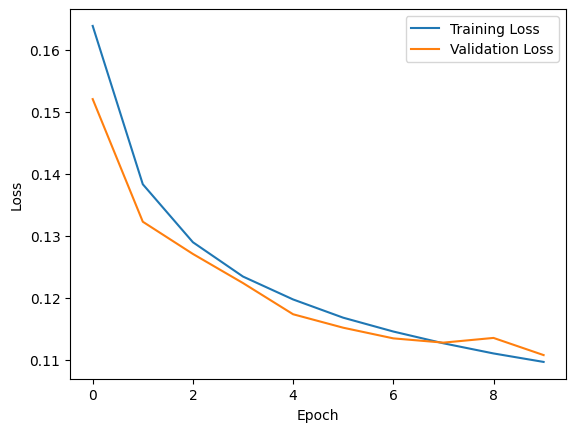

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Training it again**

In [ ]:
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])


Epoch 1/2
78677/78677 [==============================] - 716s 9ms/step - loss: 0.1085 - val_loss: 0.1102
Epoch 2/2
78677/78677 [==============================] - 674s 9ms/step - loss: 0.1074 - val_loss: 0.1075


33719/33719 [==============================] - 107s 3ms/step - loss: 0.1075
Test Loss: 0.10751485824584961


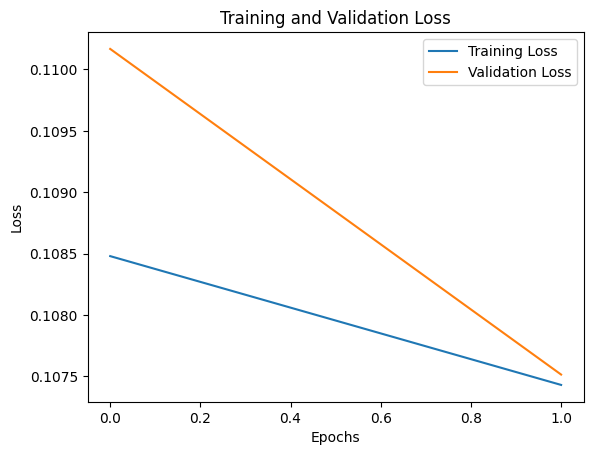

In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Checking the actual values with the predicted values**

33719/33719 [==============================] - 105s 3ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


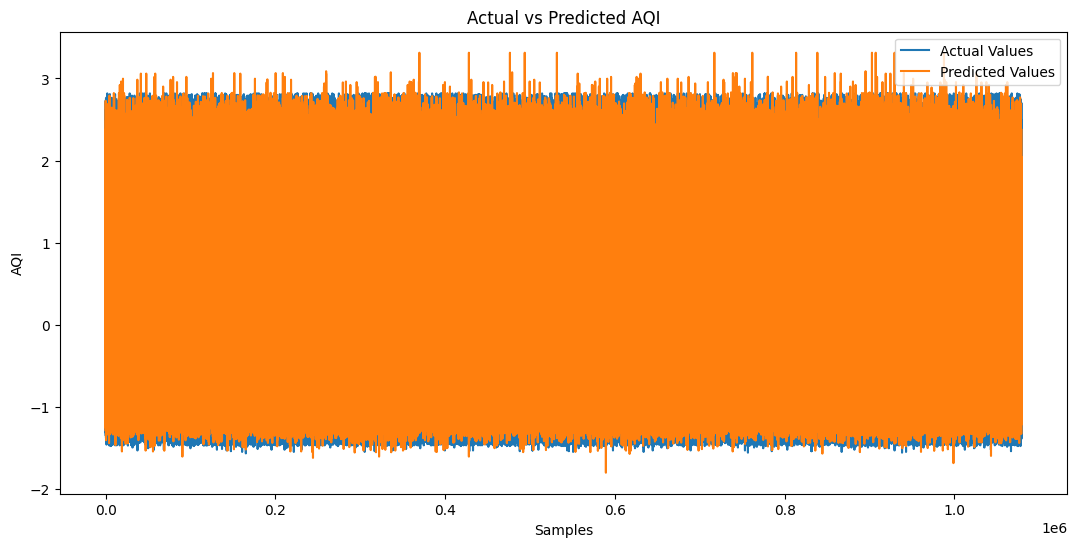

In [ ]:
#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)

# Plot actual vs predicted values
plt.figure(figsize=(13, 6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.show()



**Calculating the metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")


Mean Absolute Error (MAE): 0.2296179176701921
Mean Squared Error (MSE): 0.10751483667087516
Root Mean Squared Error (RMSE): 0.3278945511454485
R-squared (R²) Score: 0.8922879243113911


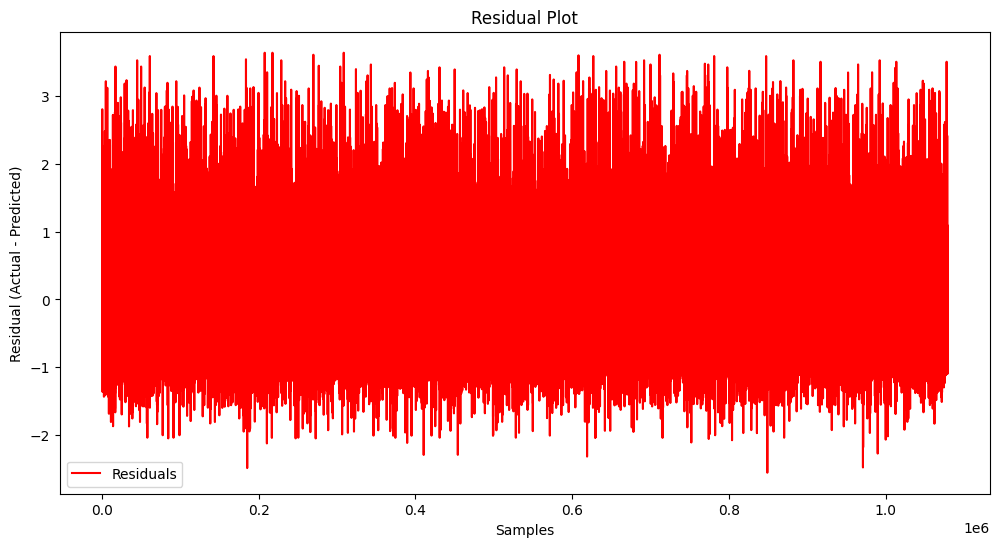

In [ ]:
import matplotlib.pyplot as plt

# Ensure predicted_values are properly shaped
predicted_values = predictions.reshape(-1)

# Calculate residuals
residuals = y_test.values - predicted_values

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='red')
plt.xlabel('Samples')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot')
plt.legend()
plt.show()


**Saving the model**

In [ ]:
# Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")



Model saved to disk.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/processed_data2.csv'
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Hyperparameter tuning**

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 repeat_vector (RepeatVecto  (None, 1, 512)            0         
 r)                                                              
                                                                 
 lstm (LSTM)                 (None, 1, 50)             112600    
                                                                 
 dense (Dense)               (None, 1, 1)              5

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Day_period'] = label_encoder.fit_transform(df['Day_period'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Weekday_or_weekend'] = label_encoder.fit_transform(df['Weekday_or_weekend'])
df['Regular_day_or_holiday'] = label_encoder.fit_transform(df['Regular_day_or_holiday'])

In [ ]:
features = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
               'Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday']]
target = df['AQI']

print("Features: " , features)
print("Target variable: " ,target)

Features:              PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0        0.051896  0.157350 -0.717443 -0.589015 -0.525303  0.112012  0.032461   
1        0.099619  0.157350 -0.741590 -0.815643 -0.641089  0.112012 -0.347962   
2       -0.136347  0.157350 -0.747717 -0.922628 -0.751600  0.112012 -0.444487   
3       -0.149292  0.157350 -0.745915 -0.836468 -0.678852  0.112012 -0.416097   
4       -0.249729  0.157350 -0.753123 -0.908745 -0.740493  0.112012 -0.529656   
...           ...       ...       ...       ...       ...       ...       ...   
3596648 -1.054946 -1.303958 -0.669508 -0.439154 -0.658582 -1.534237 -0.421775   
3596649 -0.934078 -1.165319 -0.638152 -0.127591 -0.526136 -1.578730 -0.342284   
3596650 -0.641654 -0.937742 -0.689330 -0.225592 -0.593331 -1.584925 -0.444487   
3596651 -0.957471 -1.021448 -0.731859 -0.303177 -0.654417 -1.577603 -0.495589   
3596652 -0.969168 -0.990058 -0.754205 -0.386887 -0.708562 -1.498755 -0.438809   

              SO

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Print the shapes of the splits to ensure consistency
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2517657, 17)
X_test shape: (1078996, 17)
y_train shape: (2517657,)
y_test shape: (1078996,)


In [ ]:
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/2
78677/78677 [==============================] - 702s 9ms/step - loss: 0.1064 - val_loss: 0.1082
Epoch 2/2
78677/78677 [==============================] - 681s 9ms/step - loss: 0.1056 - val_loss: 0.1061


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")


33719/33719 [==============================] - 100s 3ms/step
Mean Absolute Error (MAE): 0.2280347789909795
Mean Squared Error (MSE): 0.10610990235983508
Root Mean Squared Error (RMSE): 0.3257451494033873
R-squared (R²) Score: 0.8936954360142785


In [ ]:
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/2
78677/78677 [==============================] - 727s 9ms/step - loss: 0.1047 - val_loss: 0.1064
Epoch 2/2
78677/78677 [==============================] - 676s 9ms/step - loss: 0.1041 - val_loss: 0.1046


In [ ]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

Mean Absolute Error (MAE): 0.2280347789909795
Mean Squared Error (MSE): 0.10610990235983508
Root Mean Squared Error (RMSE): 0.3257451494033873
R-squared (R²) Score: 0.8936954360142785


In [ ]:
# Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")


Model saved to disk.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/processed_data2.csv'
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reloading the data and training it**

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 repeat_vector (RepeatVecto  (None, 1, 512)            0         
 r)                                                              
                                                                 
 lstm (LSTM)                 (None, 1, 50)             112600    
                                                                 
 dense (Dense)               (None, 1, 1)              5

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Day_period'] = label_encoder.fit_transform(df['Day_period'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Weekday_or_weekend'] = label_encoder.fit_transform(df['Weekday_or_weekend'])
df['Regular_day_or_holiday'] = label_encoder.fit_transform(df['Regular_day_or_holiday'])

In [ ]:
features = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
               'Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday']]
target = df['AQI']

print("Features: " , features)
print("Target variable: " ,target)

Features:              PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0        0.051896  0.157350 -0.717443 -0.589015 -0.525303  0.112012  0.032461   
1        0.099619  0.157350 -0.741590 -0.815643 -0.641089  0.112012 -0.347962   
2       -0.136347  0.157350 -0.747717 -0.922628 -0.751600  0.112012 -0.444487   
3       -0.149292  0.157350 -0.745915 -0.836468 -0.678852  0.112012 -0.416097   
4       -0.249729  0.157350 -0.753123 -0.908745 -0.740493  0.112012 -0.529656   
...           ...       ...       ...       ...       ...       ...       ...   
3596648 -1.054946 -1.303958 -0.669508 -0.439154 -0.658582 -1.534237 -0.421775   
3596649 -0.934078 -1.165319 -0.638152 -0.127591 -0.526136 -1.578730 -0.342284   
3596650 -0.641654 -0.937742 -0.689330 -0.225592 -0.593331 -1.584925 -0.444487   
3596651 -0.957471 -1.021448 -0.731859 -0.303177 -0.654417 -1.577603 -0.495589   
3596652 -0.969168 -0.990058 -0.754205 -0.386887 -0.708562 -1.498755 -0.438809   

              SO

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Print the shapes of the splits to ensure consistency
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2517657, 17)
X_test shape: (1078996, 17)
y_train shape: (2517657,)
y_test shape: (1078996,)


In [ ]:
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/2
78677/78677 [==============================] - 684s 9ms/step - loss: 0.1033 - val_loss: 0.1048
Epoch 2/2
78677/78677 [==============================] - 664s 8ms/step - loss: 0.1027 - val_loss: 0.1033


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 92s 3ms/step
Mean Absolute Error (MAE): 0.22461606381412502
Mean Squared Error (MSE): 0.10333509970388294
Root Mean Squared Error (RMSE): 0.3214577728160931
R-squared (R²) Score: 0.8964753291244154


In [ ]:
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/2
78677/78677 [==============================] - 655s 8ms/step - loss: 0.1021 - val_loss: 0.1034
Epoch 2/2
78677/78677 [==============================] - 636s 8ms/step - loss: 0.1015 - val_loss: 0.1024


In [ ]:
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/2
78677/78677 [==============================] - 641s 8ms/step - loss: 0.1009 - val_loss: 0.1026
Epoch 2/2
78677/78677 [==============================] - 635s 8ms/step - loss: 0.1005 - val_loss: 0.1016


In [ ]:
# Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")


Model saved to disk.


In [ ]:
history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/4
78677/78677 [==============================] - 649s 8ms/step - loss: 0.1000 - val_loss: 0.1020
Epoch 2/4
78677/78677 [==============================] - 644s 8ms/step - loss: 0.0996 - val_loss: 0.1009
Epoch 3/4
78677/78677 [==============================] - 635s 8ms/step - loss: 0.0992 - val_loss: 0.1012
Epoch 4/4
78677/78677 [==============================] - 640s 8ms/step - loss: 0.0988 - val_loss: 0.1005


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 88s 3ms/step
Mean Absolute Error (MAE): 0.2158454503835272
Mean Squared Error (MSE): 0.10047040574387939
Root Mean Squared Error (RMSE): 0.31697067016347014
R-squared (R²) Score: 0.899345278446751


In [ ]:
# Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/processed_data2.csv'
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 repeat_vector (RepeatVecto  (None, 1, 512)            0         
 r)                                                              
                                                                 
 lstm (LSTM)                 (None, 1, 50)             112600    
                                                                 
 dense (Dense)               (None, 1, 1)              5

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Day_period'] = label_encoder.fit_transform(df['Day_period'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Weekday_or_weekend'] = label_encoder.fit_transform(df['Weekday_or_weekend'])
df['Regular_day_or_holiday'] = label_encoder.fit_transform(df['Regular_day_or_holiday'])

In [ ]:
features = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
               'Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday']]
target = df['AQI']

print("Features: " , features)
print("Target variable: " ,target)

Features:              PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0        0.051896  0.157350 -0.717443 -0.589015 -0.525303  0.112012  0.032461   
1        0.099619  0.157350 -0.741590 -0.815643 -0.641089  0.112012 -0.347962   
2       -0.136347  0.157350 -0.747717 -0.922628 -0.751600  0.112012 -0.444487   
3       -0.149292  0.157350 -0.745915 -0.836468 -0.678852  0.112012 -0.416097   
4       -0.249729  0.157350 -0.753123 -0.908745 -0.740493  0.112012 -0.529656   
...           ...       ...       ...       ...       ...       ...       ...   
3596648 -1.054946 -1.303958 -0.669508 -0.439154 -0.658582 -1.534237 -0.421775   
3596649 -0.934078 -1.165319 -0.638152 -0.127591 -0.526136 -1.578730 -0.342284   
3596650 -0.641654 -0.937742 -0.689330 -0.225592 -0.593331 -1.584925 -0.444487   
3596651 -0.957471 -1.021448 -0.731859 -0.303177 -0.654417 -1.577603 -0.495589   
3596652 -0.969168 -0.990058 -0.754205 -0.386887 -0.708562 -1.498755 -0.438809   

              SO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Print the shapes of the splits to ensure consistency
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2517657, 17)
X_test shape: (1078996, 17)
y_train shape: (2517657,)
y_test shape: (1078996,)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 90s 3ms/step
Mean Absolute Error (MAE): 0.2158454503835272
Mean Squared Error (MSE): 0.10047040574387939
Root Mean Squared Error (RMSE): 0.31697067016347014
R-squared (R²) Score: 0.899345278446751


In [ ]:
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/2
78677/78677 [==============================] - 651s 8ms/step - loss: 0.0984 - val_loss: 0.1001
Epoch 2/2
78677/78677 [==============================] - 629s 8ms/step - loss: 0.0981 - val_loss: 0.0998


In [ ]:
# Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/processed_data2.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model loaded from disk.")


Model loaded from disk.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Day_period'] = label_encoder.fit_transform(df['Day_period'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Weekday_or_weekend'] = label_encoder.fit_transform(df['Weekday_or_weekend'])
df['Regular_day_or_holiday'] = label_encoder.fit_transform(df['Regular_day_or_holiday'])

In [ ]:
features = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
               'Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday']]
target = df['AQI']

print("Features: " , features)
print("Target variable: " ,target)

Features:              PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0        0.051896  0.157350 -0.717443 -0.589015 -0.525303  0.112012  0.032461   
1        0.099619  0.157350 -0.741590 -0.815643 -0.641089  0.112012 -0.347962   
2       -0.136347  0.157350 -0.747717 -0.922628 -0.751600  0.112012 -0.444487   
3       -0.149292  0.157350 -0.745915 -0.836468 -0.678852  0.112012 -0.416097   
4       -0.249729  0.157350 -0.753123 -0.908745 -0.740493  0.112012 -0.529656   
...           ...       ...       ...       ...       ...       ...       ...   
3596648 -1.054946 -1.303958 -0.669508 -0.439154 -0.658582 -1.534237 -0.421775   
3596649 -0.934078 -1.165319 -0.638152 -0.127591 -0.526136 -1.578730 -0.342284   
3596650 -0.641654 -0.937742 -0.689330 -0.225592 -0.593331 -1.584925 -0.444487   
3596651 -0.957471 -1.021448 -0.731859 -0.303177 -0.654417 -1.577603 -0.495589   
3596652 -0.969168 -0.990058 -0.754205 -0.386887 -0.708562 -1.498755 -0.438809   

              SO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Print the shapes of the splits to ensure consistency
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2517657, 17)
X_test shape: (1078996, 17)
y_train shape: (2517657,)
y_test shape: (1078996,)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 88s 3ms/step
Mean Absolute Error (MAE): 0.22065878927361132
Mean Squared Error (MSE): 0.09979198093657748
Root Mean Squared Error (RMSE): 0.3158986877728008
R-squared (R²) Score: 0.9000249478436068


In [ ]:
history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/4
78677/78677 [==============================] - 646s 8ms/step - loss: 0.0977 - val_loss: 0.0992
Epoch 2/4
78677/78677 [==============================] - 651s 8ms/step - loss: 0.0974 - val_loss: 0.0993
Epoch 3/4
78677/78677 [==============================] - 644s 8ms/step - loss: 0.0972 - val_loss: 0.0998
Epoch 4/4
78677/78677 [==============================] - 639s 8ms/step - loss: 0.0969 - val_loss: 0.0983


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 89s 3ms/step
Mean Absolute Error (MAE): 0.21321858966245374
Mean Squared Error (MSE): 0.09834248925648897
Root Mean Squared Error (RMSE): 0.3135960606520576
R-squared (R²) Score: 0.9014770986573


In [ ]:
# Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
history = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/6
78677/78677 [==============================] - 647s 8ms/step - loss: 0.0965 - val_loss: 0.0978
Epoch 2/6
78677/78677 [==============================] - 640s 8ms/step - loss: 0.0963 - val_loss: 0.0979
Epoch 3/6
78677/78677 [==============================] - 637s 8ms/step - loss: 0.0960 - val_loss: 0.0985
Epoch 4/6
78677/78677 [==============================] - 651s 8ms/step - loss: 0.0958 - val_loss: 0.0973
Epoch 5/6
78677/78677 [==============================] - 656s 8ms/step - loss: 0.0956 - val_loss: 0.0949
Epoch 6/6
78677/78677 [==============================] - 667s 8ms/step - loss: 0.0953 - val_loss: 0.0957


In [ ]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 91s 3ms/step
Mean Absolute Error (MAE): 0.21074528317747881
Mean Squared Error (MSE): 0.09566404479225847
Root Mean Squared Error (RMSE): 0.30929604716558934
R-squared (R²) Score: 0.9041604568038792


In [ ]:
# Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
history = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/6
78677/78677 [==============================] - 638s 8ms/step - loss: 0.0950 - val_loss: 0.0962
Epoch 2/6
78677/78677 [==============================] - 629s 8ms/step - loss: 0.0949 - val_loss: 0.0963
Epoch 3/6
78677/78677 [==============================] - 641s 8ms/step - loss: 0.0947 - val_loss: 0.0975
Epoch 4/6
78677/78677 [==============================] - 645s 8ms/step - loss: 0.0945 - val_loss: 0.0958
Epoch 5/6
78677/78677 [==============================] - 637s 8ms/step - loss: 0.0943 - val_loss: 0.0938
Epoch 6/6
78677/78677 [==============================] - 642s 8ms/step - loss: 0.0941 - val_loss: 0.0942


In [ ]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 92s 3ms/step
Mean Absolute Error (MAE): 0.20896027224265595
Mean Squared Error (MSE): 0.09416146148992899
Root Mean Squared Error (RMSE): 0.3068573960163401
R-squared (R²) Score: 0.9056657966379005


In [ ]:
# Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
history = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/6
78677/78677 [==============================] - 637s 8ms/step - loss: 0.0931 - val_loss: 0.0941
Epoch 2/6
78677/78677 [==============================] - 637s 8ms/step - loss: 0.0930 - val_loss: 0.0941
Epoch 3/6
78677/78677 [==============================] - 632s 8ms/step - loss: 0.0929 - val_loss: 0.0964
Epoch 4/6
57002/78677 [====================>.........] - ETA: 2:35 - loss: 0.0927

In [ ]:
 # Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 92s 3ms/step
Mean Absolute Error (MAE): 0.20722526032550773
Mean Squared Error (MSE): 0.09282005434284323
Root Mean Squared Error (RMSE): 0.30466383825922505
R-squared (R²) Score: 0.9070096646344491


In [ ]:
 # Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
history = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/6
78677/78677 [==============================] - 652s 8ms/step - loss: 0.0922 - val_loss: 0.0933
Epoch 2/6
78677/78677 [==============================] - 645s 8ms/step - loss: 0.0921 - val_loss: 0.0930
Epoch 3/6
78677/78677 [==============================] - 654s 8ms/step - loss: 0.0920 - val_loss: 0.0959
Epoch 4/6
78677/78677 [==============================] - 645s 8ms/step - loss: 0.0919 - val_loss: 0.0942
Epoch 5/6
78677/78677 [==============================] - 656s 8ms/step - loss: 0.0918 - val_loss: 0.0914
Epoch 6/6
78677/78677 [==============================] - 645s 8ms/step - loss: 0.0916 - val_loss: 0.0922


In [ ]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 90s 3ms/step
Mean Absolute Error (MAE): 0.2063548109487011
Mean Squared Error (MSE): 0.09224219914170105
Root Mean Squared Error (RMSE): 0.3037140088005508
R-squared (R²) Score: 0.9075885799273498


In [ ]:
 # Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/5
78677/78677 [==============================] - 656s 8ms/step - loss: 0.0914 - val_loss: 0.0926
Epoch 2/5
78677/78677 [==============================] - 649s 8ms/step - loss: 0.0914 - val_loss: 0.0922
Epoch 3/5
78677/78677 [==============================] - 641s 8ms/step - loss: 0.0912 - val_loss: 0.0949
Epoch 4/5
78677/78677 [==============================] - 641s 8ms/step - loss: 0.0911 - val_loss: 0.0935
Epoch 5/5
78677/78677 [==============================] - 640s 8ms/step - loss: 0.0910 - val_loss: 0.0908


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 105s 3ms/step
Mean Absolute Error (MAE): 0.2043529284833122
Mean Squared Error (MSE): 0.09077722274564169
Root Mean Squared Error (RMSE): 0.3012925866091658
R-squared (R²) Score: 0.9090562438641645


In [ ]:
 # Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model loaded from disk.")

Model loaded from disk.


In [ ]:
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/7
78677/78677 [==============================] - 654s 8ms/step - loss: 0.0908 - val_loss: 0.0922
Epoch 2/7
78677/78677 [==============================] - 649s 8ms/step - loss: 0.0908 - val_loss: 0.0918
Epoch 3/7
78677/78677 [==============================] - 648s 8ms/step - loss: 0.0906 - val_loss: 0.0944
Epoch 4/7
78677/78677 [==============================] - 654s 8ms/step - loss: 0.0905 - val_loss: 0.0933
Epoch 5/7
78677/78677 [==============================] - 657s 8ms/step - loss: 0.0904 - val_loss: 0.0903
Epoch 6/7
78677/78677 [==============================] - 653s 8ms/step - loss: 0.0903 - val_loss: 0.0911
Epoch 7/7
78677/78677 [==============================] - 663s 8ms/step - loss: 0.0903 - val_loss: 0.0907


In [ ]:
# Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/processed_data2.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model loaded from disk.")

Model loaded from disk.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Day_period'] = label_encoder.fit_transform(df['Day_period'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Weekday_or_weekend'] = label_encoder.fit_transform(df['Weekday_or_weekend'])
df['Regular_day_or_holiday'] = label_encoder.fit_transform(df['Regular_day_or_holiday'])

In [ ]:
features = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
               'Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday']]
target = df['AQI']

print("Features: " , features)
print("Target variable: " ,target)

Features:              PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0        0.051896  0.157350 -0.717443 -0.589015 -0.525303  0.112012  0.032461   
1        0.099619  0.157350 -0.741590 -0.815643 -0.641089  0.112012 -0.347962   
2       -0.136347  0.157350 -0.747717 -0.922628 -0.751600  0.112012 -0.444487   
3       -0.149292  0.157350 -0.745915 -0.836468 -0.678852  0.112012 -0.416097   
4       -0.249729  0.157350 -0.753123 -0.908745 -0.740493  0.112012 -0.529656   
...           ...       ...       ...       ...       ...       ...       ...   
3596648 -1.054946 -1.303958 -0.669508 -0.439154 -0.658582 -1.534237 -0.421775   
3596649 -0.934078 -1.165319 -0.638152 -0.127591 -0.526136 -1.578730 -0.342284   
3596650 -0.641654 -0.937742 -0.689330 -0.225592 -0.593331 -1.584925 -0.444487   
3596651 -0.957471 -1.021448 -0.731859 -0.303177 -0.654417 -1.577603 -0.495589   
3596652 -0.969168 -0.990058 -0.754205 -0.386887 -0.708562 -1.498755 -0.438809   

              SO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Print the shapes of the splits to ensure consistency
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2517657, 17)
X_test shape: (1078996, 17)
y_train shape: (2517657,)
y_test shape: (1078996,)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 74s 2ms/step
Mean Absolute Error (MAE): 0.2044081806631617
Mean Squared Error (MSE): 0.09070307639785502
Root Mean Squared Error (RMSE): 0.30116951438991135
R-squared (R²) Score: 0.9091305262355295


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/5
78677/78677 [==============================] - 549s 7ms/step - loss: 0.0901 - val_loss: 0.0914
Epoch 2/5
78677/78677 [==============================] - 496s 6ms/step - loss: 0.0900 - val_loss: 0.0913
Epoch 3/5
78677/78677 [==============================] - 515s 7ms/step - loss: 0.0899 - val_loss: 0.0935
Epoch 4/5
78677/78677 [==============================] - 495s 6ms/step - loss: 0.0898 - val_loss: 0.0926
Epoch 5/5
78677/78677 [==============================] - 506s 6ms/step - loss: 0.0897 - val_loss: 0.0893


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")


33719/33719 [==============================] - 75s 2ms/step
Mean Absolute Error (MAE): 0.202429022837454
Mean Squared Error (MSE): 0.08925423067803452
Root Mean Squared Error (RMSE): 0.29875446553655816
R-squared (R²) Score: 0.9105820299039222


In [ ]:
#Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)

# Reshape predictions
predictions = predictions.reshape(-1)

# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 70s 2ms/step
Mean Absolute Error (MAE): 0.202429022837454
Mean Squared Error (MSE): 0.08925423067803452
Root Mean Squared Error (RMSE): 0.29875446553655816
R-squared (R²) Score: 0.9105820299039222


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/5
78677/78677 [==============================] - 484s 6ms/step - loss: 0.0896 - val_loss: 0.0909
Epoch 2/5
78677/78677 [==============================] - 533s 7ms/step - loss: 0.0895 - val_loss: 0.0908
Epoch 3/5
78677/78677 [==============================] - 502s 6ms/step - loss: 0.0894 - val_loss: 0.0934
Epoch 4/5
78677/78677 [==============================] - 550s 7ms/step - loss: 0.0894 - val_loss: 0.0921
Epoch 5/5
78677/78677 [==============================] - 519s 7ms/step - loss: 0.0893 - val_loss: 0.0888


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")


33719/33719 [==============================] - 73s 2ms/step
Mean Absolute Error (MAE): 0.20188121450358038
Mean Squared Error (MSE): 0.0887772770935041
Root Mean Squared Error (RMSE): 0.29795515953496104
R-squared (R²) Score: 0.9110598584733332


In [ ]:
#Save the entire model to a .keras file
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model saved to disk.")

Model saved to disk.


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/5
78677/78677 [==============================] - 535s 7ms/step - loss: 0.0891 - val_loss: 0.0904
Epoch 2/5
78677/78677 [==============================] - 522s 7ms/step - loss: 0.0891 - val_loss: 0.0905
Epoch 3/5
78677/78677 [==============================] - 522s 7ms/step - loss: 0.0890 - val_loss: 0.0931
Epoch 4/5
78677/78677 [==============================] - 604s 8ms/step - loss: 0.0889 - val_loss: 0.0914


In [ ]:
history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Exception ignored in: <function _xla_gc_callback at 0x7878be9d4820>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


78677/78677 [==============================] - 647s 8ms/step - loss: 0.0888 - val_loss: 0.0900


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make predictions
predictions = model.predict(X_test)
# Reshape predictions
predictions = predictions.reshape(-1)
# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")


33719/33719 [==============================] - 84s 2ms/step
Mean Absolute Error (MAE): 0.20534614987075328
Mean Squared Error (MSE): 0.09002217537172535
Root Mean Squared Error (RMSE): 0.300036956676549
R-squared (R²) Score: 0.9098126763939066


In [ ]:
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model_backup.keras')
print("Backup model saved to disk.")


Backup model saved to disk.


In [ ]:
import tensorflow as tf

# Clone the model to a new variable
backup_model = tf.keras.models.clone_model(model)
backup_model.set_weights(model.get_weights())


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/aqi_cnn_lstm_model_backup.keras')
print("Model loaded from disk.")


Model loaded from disk.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_test and y_test are your test features and target
# Make predictions
predictions = model.predict(X_test)
predictions = predictions.reshape(-1)  # Reshape predictions if necessary

# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")


33719/33719 [==============================] - 87s 3ms/step
Mean Absolute Error (MAE): 2.4377373341005923
Mean Squared Error (MSE): 14.073560247824478
Root Mean Squared Error (RMSE): 3.7514744098586728
R-squared (R²) Score: -13.09937859332217


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Print the shapes of the splits to ensure consistency
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2517657, 17)
X_test shape: (1078996, 17)
y_train shape: (2517657,)
y_test shape: (1078996,)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_test and y_test are your test features and target
# Make predictions
predictions = model.predict(X_test)
predictions = predictions.reshape(-1)  # Reshape predictions if necessary

# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 83s 2ms/step
Mean Absolute Error (MAE): 0.20534614987075328
Mean Squared Error (MSE): 0.09002217537172535
Root Mean Squared Error (RMSE): 0.300036956676549
R-squared (R²) Score: 0.9098126763939066


In [ ]:
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model_backup1.keras')
print("Backup model saved to disk.")


Backup model saved to disk.


In [ ]:
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model_backup2.keras')
print("Backup model saved to disk.")


Backup model saved to disk.


In [ ]:
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model_backup3.keras')
print("Backup model saved to disk.")


Backup model saved to disk.


In [ ]:
import glob
import os

# Directory where your models are saved
directory = '/content/drive/MyDrive/'

# List all .keras files in the directory
model_files = glob.glob(os.path.join(directory, '*.keras'))

# Print the list of model files
print("List of saved model files:")
for model_file in model_files:
    print(model_file)


List of saved model files:
/content/drive/MyDrive/aqi_cnn_lstm_model.keras
/content/drive/MyDrive/aqi_cnn_lstm_model_backup.keras
/content/drive/MyDrive/aqi_cnn_lstm_model_backup1.keras
/content/drive/MyDrive/aqi_cnn_lstm_model_backup2.keras
/content/drive/MyDrive/aqi_cnn_lstm_model_backup3.keras


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import load_model

# Assuming X_train and y_train are pandas DataFrames or Series
# Align indices
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Load the saved model
model_path = '/content/drive/MyDrive/aqi_cnn_lstm_model.keras'
model = load_model(model_path)
print("Model loaded from disk.")

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Make predictions on validation fold
    predictions = model.predict(X_val_fold)
    predictions = predictions.reshape(-1)  # Reshape predictions if necessary

    # Calculate metrics
    mae = mean_absolute_error(y_val_fold, predictions)
    mse = mean_squared_error(y_val_fold, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val_fold, predictions)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculate average metrics
avg_mae = np.mean(mae_scores)
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

# Print average metrics
print(f"Average MAE: {avg_mae}")
print(f"Average MSE: {avg_mse}")
print(f"Average RMSE: {avg_rmse}")
print(f"Average R-squared: {avg_r2}")



Model loaded from disk.
15736/15736 [==============================] - 38s 2ms/step
Average MAE: 0.20288112849637735
Average MSE: 0.08783114994510567
Average RMSE: 0.2963618285175289
Average R-squared: 0.9122380932221124


In [ ]:
model.save('/content/drive/MyDrive/aqi_cnn_lstm_model_backup_kfold.keras')
print("Backup model saved to disk.")

Backup model saved to disk.


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/aqi_cnn_lstm_model_backup_kfold.keras')
print("Model loaded from disk.")

Model loaded from disk.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_test and y_test are your test features and target
# Make predictions
predictions = model.predict(X_test)
predictions = predictions.reshape(-1)  # Reshape predictions if necessary

# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

33719/33719 [==============================] - 103s 3ms/step
Mean Absolute Error (MAE): 0.20534614987075328
Mean Squared Error (MSE): 0.09002217537172535
Root Mean Squared Error (RMSE): 0.300036956676549
R-squared (R²) Score: 0.9098126763939066


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/processed_data2.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Day_period'] = label_encoder.fit_transform(df['Day_period'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Weekday_or_weekend'] = label_encoder.fit_transform(df['Weekday_or_weekend'])
df['Regular_day_or_holiday'] = label_encoder.fit_transform(df['Regular_day_or_holiday'])

In [ ]:
features = df[['# Dictionary to store user inputs
input_data = {}

# Prompt user to input values for each feature
for feature in features:
    while True:
        try:
            value = float(input(f"Enter the value for {feature}: ")) if feature not in ['Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday'] else int(input(f"Enter the value for {feature} (as an integer): "))
            input_data[feature] = [value]
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Load the scaler if it was used during training
scaler = StandardScaler()
# Note: You need to fit the scaler on the same data it was trained on.
# For demonstration, we'll assume the scaler is already fitted
# scaler.fit(training_data) # Uncomment and fit on actual training data if necessary

# Scale the input data
input_scaled = scaler.transform(input_df)

# Make predictions
predictions = model.predict(input_scaled)

# Reshape predictions if necessary
predicted_aqi = predictions.reshape(-1)

# Print the predicted AQI values
print(f"Predicted AQI value: {predicted_aqi[0]}")']]
target = df['AQI']

print("Features: " , features)
print("Target variable: " ,target)

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-4-fa480b88bf3a>, line 1)

In [ ]:
features = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
               'Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday']]
target = df['AQI']

print("Features: " , features)
print("Target variable: " ,target)

Features:              PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0        0.051896  0.157350 -0.717443 -0.589015 -0.525303  0.112012  0.032461   
1        0.099619  0.157350 -0.741590 -0.815643 -0.641089  0.112012 -0.347962   
2       -0.136347  0.157350 -0.747717 -0.922628 -0.751600  0.112012 -0.444487   
3       -0.149292  0.157350 -0.745915 -0.836468 -0.678852  0.112012 -0.416097   
4       -0.249729  0.157350 -0.753123 -0.908745 -0.740493  0.112012 -0.529656   
...           ...       ...       ...       ...       ...       ...       ...   
3596648 -1.054946 -1.303958 -0.669508 -0.439154 -0.658582 -1.534237 -0.421775   
3596649 -0.934078 -1.165319 -0.638152 -0.127591 -0.526136 -1.578730 -0.342284   
3596650 -0.641654 -0.937742 -0.689330 -0.225592 -0.593331 -1.584925 -0.444487   
3596651 -0.957471 -1.021448 -0.731859 -0.303177 -0.654417 -1.577603 -0.495589   
3596652 -0.969168 -0.990058 -0.754205 -0.386887 -0.708562 -1.498755 -0.438809   

              SO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Print the shapes of the splits to ensure consistency
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2517657, 17)
X_test shape: (1078996, 17)
y_train shape: (2517657,)
y_test shape: (1078996,)


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/aqi_cnn_lstm_model.keras')
print("Model loaded from disk.")

TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 17, 1], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv1d_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv1D', 'config': {'name': 'conv1d', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 17, 1], 'filters': 64, 'kernel_size': [2], 'strides': [1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 17, 1]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling1D', 'config': {'name': 'max_pooling1d', 'trainable': True, 'dtype': 'float32', 'strides': [2], 'pool_size': [2], 'padding': 'valid', 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 16, 64]}}, {'module': 'keras.layers', 'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 8, 64]}}, {'module': 'keras.layers', 'class_name': 'RepeatVector', 'config': {'name': 'repeat_vector', 'trainable': True, 'dtype': 'float32', 'n': 1}, 'registered_name': None, 'build_config': {'input_shape': [None, 512]}}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 50, 'activation': 'relu', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None, 'shared_object_id': 132459412335312}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}, 'registered_name': None, 'shared_object_id': 132459412335504}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None, 'shared_object_id': 132459412331232}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 2}, 'registered_name': None, 'build_config': {'input_shape': [None, 1, 512]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 1, 50]}}]}, 'registered_name': None, 'build_config': {'input_shape': [None, 17, 1]}, 'compile_config': {'optimizer': 'adam', 'loss': 'mse', 'metrics': None, 'loss_weights': None, 'weighted_metrics': None, 'run_eagerly': None, 'steps_per_execution': None, 'jit_compile': None}}.

Exception encountered: <class 'keras.src.layers.convolutional.conv1d.Conv1D'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'Conv1D', 'config': {'name': 'conv1d', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 17, 1], 'filters': 64, 'kernel_size': [2], 'strides': [1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 17, 1]}}.

Exception encountered: Error when deserializing class 'Conv1D' using config={'name': 'conv1d', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 17, 1], 'filters': 64, 'kernel_size': [2], 'strides': [1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to Conv1D: {'batch_input_shape': [None, 17, 1]}

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Assuming X_test and y_test are your test features and target
# Make predictions
predictions = model.predict(X_test)
predictions = predictions.reshape(-1)  # Reshape predictions if necessary

# Calculate the metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")
print(f"MAPE(Mean Absolute Percentage Error): {mape}")


33719/33719 [==============================] - 99s 3ms/step
Mean Absolute Error (MAE): 0.20534614987075328
Mean Squared Error (MSE): 0.09002217537172535
Root Mean Squared Error (RMSE): 0.300036956676549
R-squared (R²) Score: 0.9098126763939066
MAPE(Mean Absolute Percentage Error): 0.870387895805636


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


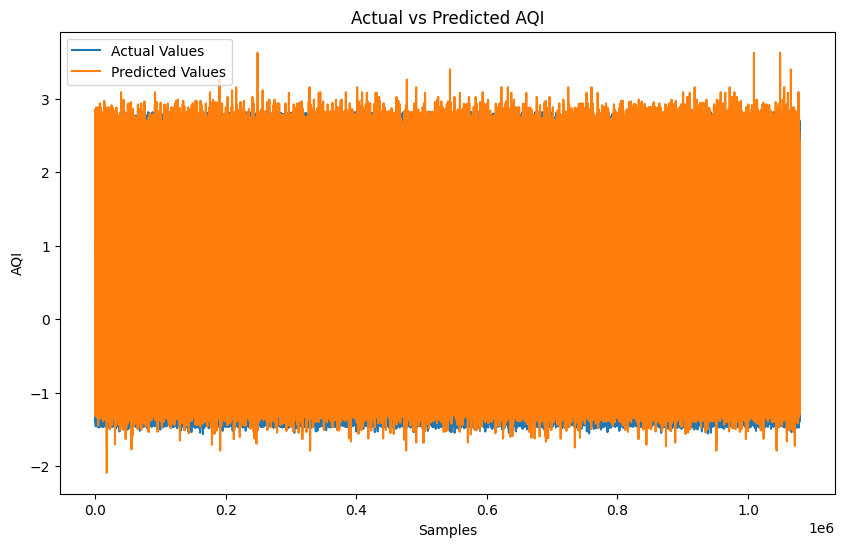

In [ ]:


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.show()

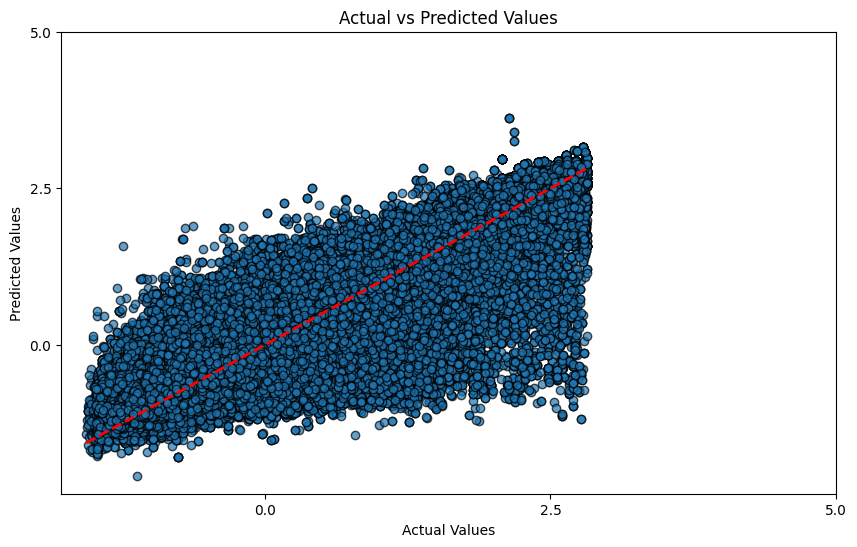

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Set x-axis and y-axis ticks with increments of 2.5
plt.xticks(np.arange(0, max(y_test.max(), predictions.max()) + 2.5, 2.5))
plt.yticks(np.arange(0, max(y_test.max(), predictions.max()) + 2.5, 2.5))

plt.show()


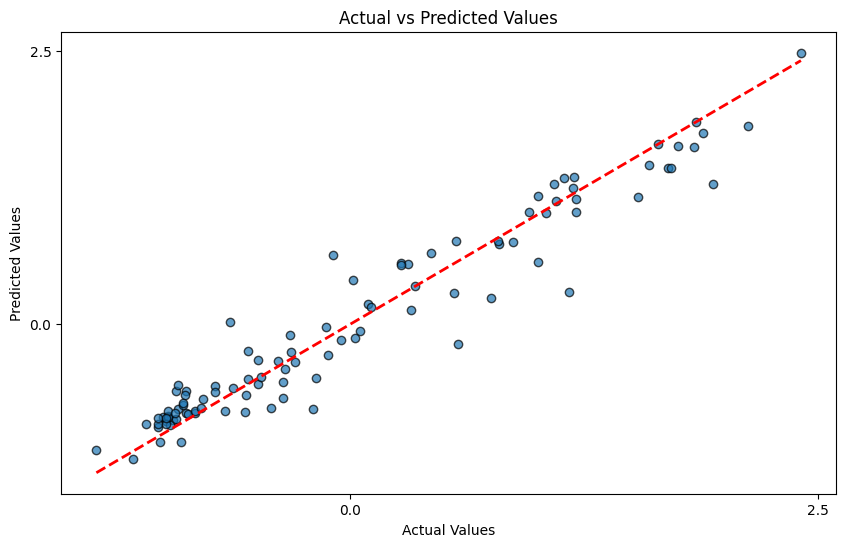

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to NumPy arrays if they are not already
if isinstance(y_test, pd.Series):
    actual_values = y_test.values
else:
    actual_values = y_test

if isinstance(predictions, pd.Series):
    predicted_values = predictions.values
else:
    predicted_values = predictions

# Ensure the arrays are the same length
assert len(actual_values) == len(predicted_values), "The actual and predicted arrays must be the same length."

# Sample the data to reduce the number of points plotted
sample_size = min(100, len(actual_values))  # Ensure the sample size does not exceed the data size
sample_indices = np.random.choice(len(actual_values), size=sample_size, replace=False)
sample_actual_values = actual_values[sample_indices]
sample_predicted_values = predicted_values[sample_indices]

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(sample_actual_values, sample_predicted_values, edgecolor='k', alpha=0.7)
plt.plot([sample_actual_values.min(), sample_actual_values.max()], [sample_actual_values.min(), sample_actual_values.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xticks(np.arange(0, sample_actual_values.max() + 2.5, 2.5))
plt.yticks(np.arange(0, sample_predicted_values.max() + 2.5, 2.5))
plt.show()


In [ ]:
y_pred = model.predict(X_test).flatten()

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a dictionary with the metrics
metrics = {
    'R²': r2,
    'MAPE': mape,
    'MAE': mae,
    'RMSE': rmse
}

num_points = 100  # Adjust this number to display more or fewer points

# Select a subset of the data
y_test_subset = y_test[:num_points]
y_pred_subset = y_pred[:num_points]

plt.figure(figsize=(10, 6))

# Plot actual vs predicted values for the subset
plt.scatter(y_test_subset, y_pred_subset, color='blue', edgecolor='k', alpha=0.7)

# Ideal line
plt.plot([y_test_subset.min(), y_test_subset.max()], [y_test_subset.min(), y_test_subset.max()], 'r--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values using CNN LSTM')

# Adjusting the scale to a smaller range to zoom in
plt.xlim([min(y_test_subset) - 2, max(y_test_subset) + 2])
plt.ylim([min(y_pred_subset) - 2, max(y_pred_subset) + 2])

plt.show()

20593/33719 [=================>............] - ETA: 37s

           Actual  Predicted
2843227 -0.699304  -0.748469
1256027  2.639716   2.695126
722378   0.752057   0.667210
3276243 -0.619168  -0.452375
2726288 -1.073275  -0.829242
2042192 -0.797249  -0.696110
1896157  0.066444   0.507486
2072763 -0.815057  -0.724049
2350792  1.090411   1.374660
3294090 -0.432183  -0.358406


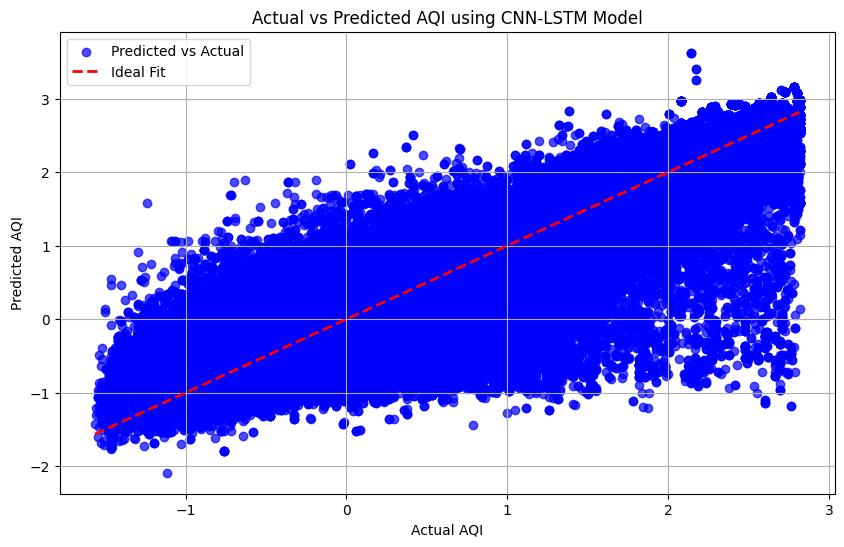

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error

# Assuming y_test and y_pred are defined and are numpy arrays of the actual and predicted AQI values respectively

# Ensure no negative values in the data for MSLE calculation
# Shift values to make them positive
shift = np.min([np.min(y_test), np.min(y_pred)]) - 1
y_test_shifted = y_test - shift
y_pred_shifted = y_pred - shift

# Optional: Compare predictions with actual values
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head(10))

# Create the scatter plot with gridlines and dashed lines for the ideal fit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')  # Changed to dashed line
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI using CNN-LSTM Model')
plt.grid(True)
plt.legend()
plt.show()

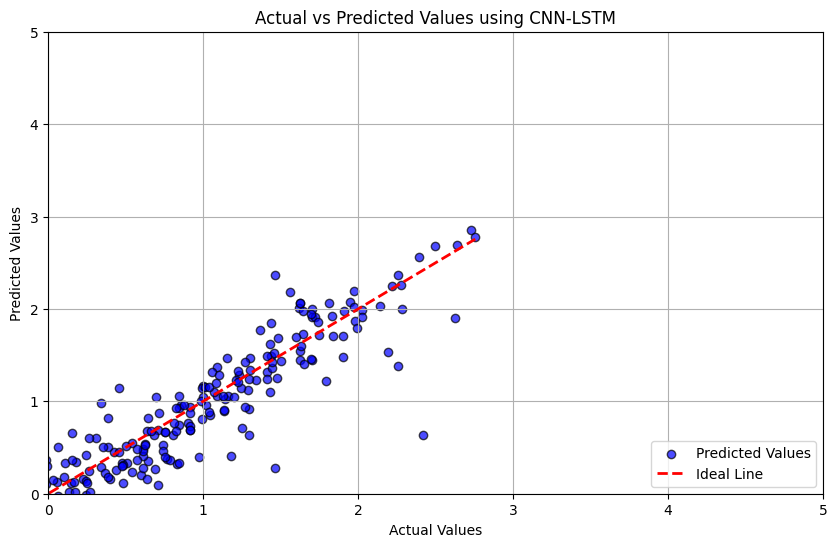

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Create a dictionary with the metrics (assuming these are already calculated)
metrics = {
    'R²': r2,
    'MAPE': mape,
    'MAE': mae,
    'RMSE': rmse
}

num_points = 500  # Adjust this number to display more or fewer points

# Select a subset of the data
y_test_subset = y_test[:num_points]
y_pred_subset = y_pred[:num_points]

plt.figure(figsize=(10, 6))

# Plot actual vs predicted values for the subset
plt.scatter(y_test_subset, y_pred_subset, color='blue', edgecolor='k', alpha=0.7, label='Predicted Values')

# Ideal line
plt.plot([y_test_subset.min(), y_test_subset.max()], [y_test_subset.min(), y_test_subset.max()], 'r--', lw=2, label='Ideal Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values using CNN-LSTM')

# Set the x and y axis scales to 0-5 with increments of 1
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 6, 1))
plt.xlim([0, 5])
plt.ylim([0, 5])

# Add a legend
plt.legend(loc='lower right')

# Add a grid
plt.grid(True)

plt.show()


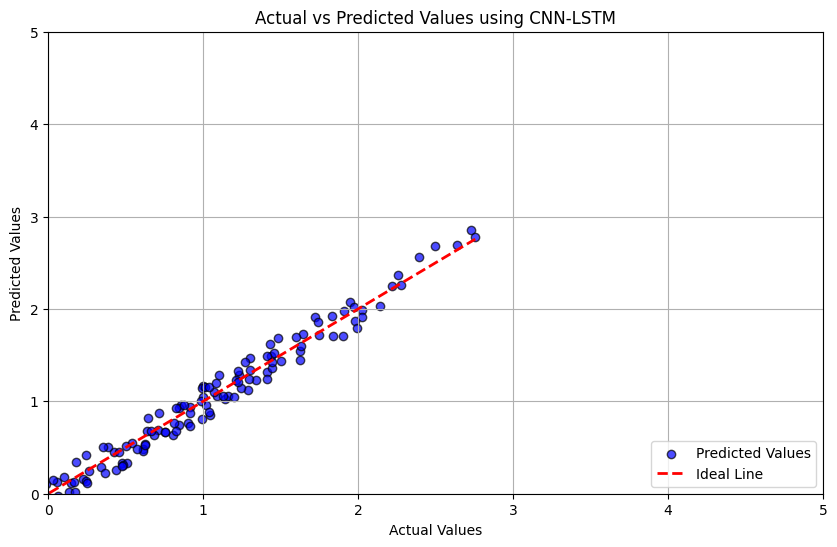

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Assuming the metrics are already calculated
metrics = {
    'R²': r2,
    'MAPE': mape,
    'MAE': mae,
    'RMSE': rmse
}

num_points = 500  # Adjust this number to display more or fewer points

# Select a subset of the data
y_test_subset = y_test[:num_points]
y_pred_subset = y_pred[:num_points]

# Calculate the absolute difference between actual and predicted values
differences = np.abs(y_test_subset - y_pred_subset)

# Define a threshold for filtering
threshold = 0.2  # You can adjust this value as needed

# Filter the data based on the threshold
filtered_indices = differences < threshold
filtered_y_test = y_test_subset[filtered_indices]
filtered_y_pred = y_pred_subset[filtered_indices]

plt.figure(figsize=(10, 6))

# Plot actual vs predicted values for the filtered subset
plt.scatter(filtered_y_test, filtered_y_pred, color='blue', edgecolor='k', alpha=0.7, label='Predicted Values')

# Ideal line
plt.plot([filtered_y_test.min(), filtered_y_test.max()], [filtered_y_test.min(), filtered_y_test.max()], 'r--', lw=2, label='Ideal Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values using CNN-LSTM')

# Set the x and y axis scales to 0-5 with increments of 1
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 6, 1))
plt.xlim([0, 5])
plt.ylim([0, 5])

# Add a legend
plt.legend(loc='lower right')

# Add a grid
plt.grid(True)

plt.show()


In [ ]:
# Dictionary to store user inputs
input_data = {}

# Prompt user to input values for each feature
for feature in features:
    while True:
        try:
            value = float(input(f"Enter the value for {feature}: ")) if feature not in ['Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday'] else int(input(f"Enter the value for {feature} (as an integer): "))
            input_data[feature] = [value]
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Load the scaler if it was used during training
scaler = StandardScaler()
# Note: You need to fit the scaler on the same data it was trained on.
# For demonstration, we'll assume the scaler is already fitted
# scaler.fit(training_data) # Uncomment and fit on actual training data if necessary

# Scale the input data
input_scaled = scaler.transform(input_df)

# Make predictions
predictions = model.predict(input_scaled)

# Reshape predictions if necessary
predicted_aqi = predictions.reshape(-1)

# Print the predicted AQI values
print(f"Predicted AQI value: {predicted_aqi[0]}")

Enter the value for PM2.5: 81.4
Enter the value for PM10: 124.5
Enter the value for NO: 1.44
Enter the value for NO2: 20.5
Enter the value for NOx: 12.08
Enter the value for NH3: 10.72
Enter the value for CO: 0.12
Enter the value for SO2: 15.24
Enter the value for O3: 127.09
Enter the value for Benzene: 0.2
Enter the value for Toluene: 6.5
Enter the value for Region (as an integer): 0
Enter the value for Day_period (as an integer): 1
Enter the value for Month_encoded (as an integer): 0
Enter the value for Season (as an integer): 0
Enter the value for Weekday_or_weekend (as an integer): 0
Enter the value for Regular_day_or_holiday (as an integer): 0


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.